In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [7]:
fake = pd.read_csv(r"C:\Users\dhchaudhary\Desktop\fake_news\Fake.csv")
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
real = pd.read_csv(r"C:\Users\dhchaudhary\Desktop\fake_news\True.csv")
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
fake.loc[0, 'title']

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing'

### Since we have separate file for fake and real news, So concatenate both file by assignin labels

In [10]:
fake['label'] = 1

In [11]:
real['label'] = 0

In [12]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [13]:
final_data = pd.concat([fake, real], axis=0,ignore_index=True)

In [14]:
final_data.shape

(44898, 5)

### Shuffle the rows of the dataframe

In [15]:
final_data = final_data.sample(frac = 1) 

In [17]:
final_data.head()

,title,text,subject,date,label
15685,MSNBC Tweets Terrifying Video Of Cop Being Dra...,MSNBC the cable news station who hired tax ...,politics,"May 17, 2015",1
42255,Turkey's Erdogan calls Iraqi Kurdish referendu...,ANKARA (Reuters) - Turkish President Tayyip Er...,worldnews,"September 28, 2017",0
25496,U.S. state election officials still in the dar...,"ANAHEIM, Calif. (Reuters) - The federal govern...",politicsNews,"August 25, 2017",0
4111,America’s Most Corrupt Sheriff Set To Lose Re...,"Two days ago, a poll from the Arizona Republic...",News,"October 20, 2016",1
6780,Watch As The Right Changes History Before You...,The announcement that Harriet Tubman would rep...,News,"April 21, 2016",1


In [19]:
independent = final_data.drop('label',axis=1)

In [20]:
dependent = final_data['label']

In [24]:
final_data.head()

,title,text,subject,date,label
15685,MSNBC Tweets Terrifying Video Of Cop Being Dra...,MSNBC the cable news station who hired tax ...,politics,"May 17, 2015",1
42255,Turkey's Erdogan calls Iraqi Kurdish referendu...,ANKARA (Reuters) - Turkish President Tayyip Er...,worldnews,"September 28, 2017",0
25496,U.S. state election officials still in the dar...,"ANAHEIM, Calif. (Reuters) - The federal govern...",politicsNews,"August 25, 2017",0
4111,America’s Most Corrupt Sheriff Set To Lose Re...,"Two days ago, a poll from the Arizona Republic...",News,"October 20, 2016",1
6780,Watch As The Right Changes History Before You...,The announcement that Harriet Tubman would rep...,News,"April 21, 2016",1


In [31]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 15685 to 38946
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [33]:
len(final_data)

44898

### EDA

In [75]:
final_data.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

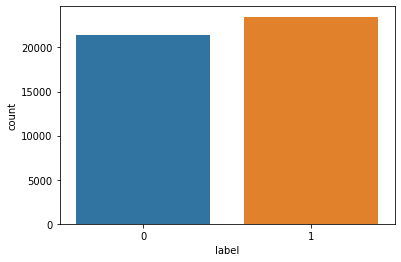

In [77]:
sns.countplot(final_data.label)

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

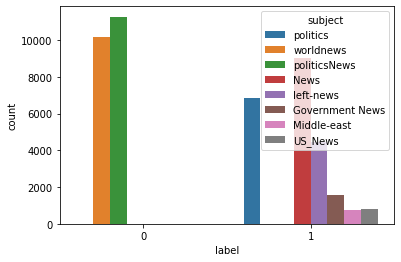

In [81]:
sns.countplot(final_data.label, hue = final_data.subject)

## Data Preprocessing

In [36]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [37]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(final_data)):
    review = re.sub('[^a-zA-Z]', ' ', final_data['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [40]:
corpus[0]

'donald trump send embarrass new year eve messag disturb'

## Applying Bag of words (can be done by CountVectorizer of sklearn)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
x = cv.fit_transform(corpus).toarray()

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, dependent, test_size=0.3, random_state=0)

## Applying MultiNomialNB


In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools
mnbclassifier=MultinomialNB()

In [47]:
mnbclassifier.fit(x_train, y_train)

MultinomialNB()

In [49]:
prediction = mnbclassifier.predict(x_test)

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [73]:
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, prediction))

Confusion matrix: 
 [[2929 3535]
 [3107 3899]]


In [74]:
print("Accuracy score:", metrics.accuracy_score(y_test, prediction))

Accuracy score: 0.5069042316258352


## Plotting Roc-Auc Curve

In [57]:
probs = mnbclassifier.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

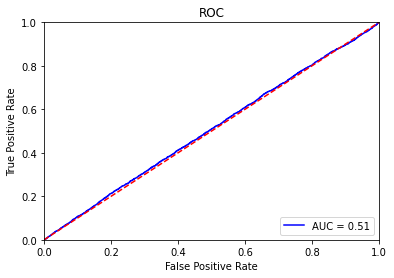

In [58]:
import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
## Get Features names
feature_names = cv.get_feature_names()

# More negative the value is, more the fakest word it is, and vice versa

### Top 10 words associated with Real news

In [67]:
### Most real news
sorted(zip(mnbclassifier.coef_[0], feature_names), reverse=True)[:10]

[(-3.424129864462971, 'trump'),
 (-3.945910118055691, 'video'),
 (-4.697672801450085, 'say'),
 (-4.981861420567306, 'obama'),
 (-5.260574823036326, 'hillari'),
 (-5.366191387856991, 'hous'),
 (-5.385584367956086, 'watch'),
 (-5.474258650662087, 'presid'),
 (-5.497347699434451, 'republican'),
 (-5.51353642678437, 'clinton')]

### Top 10 words associated with Fake news

In [71]:
sorted(zip(classifier.coef_[0], feature_names))[:10]

[(-12.129131604194049, 'state target'),
 (-12.129131604194049, 'usa usa'),
 (-11.381917202363827, 'along'),
 (-11.381917202363827, 'arkansa'),
 (-11.381917202363827, 'explain trump'),
 (-11.381917202363827, 'fill top'),
 (-11.381917202363827, 'fill top job'),
 (-11.381917202363827, 'job administr'),
 (-11.381917202363827, 'top job administr'),
 (-11.381917202363827, 'trump fill')]